In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [2]:
from qml_hep_lhc.data import MNIST
from qml_hep_lhc.data.utils import extract_samples
import numpy as np
import matplotlib.pyplot as plt

2022-07-20 11:17:04.953703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 11:17:04.953737: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
data = MNIST()
data.prepare_data()

Processed False
DATA DIR /home/gopald/Documents/qml-hep-lhc/datasets/downloaded


In [9]:
percent_train = 0.05 

# 60,000/10 = 6000 images per class (approx)
# 6000 * 0.05 = 300 images per class

# if val_split = 0.2
# n_val = 300 * 0.2 = 60 per class
# n_train = 300 -60 = 240 per class

percent_test = 0.1

# 10,000/10 = 1000 images per class (approx)
# 1000 * 0.1 = 100 images per class

data.x_train, data.y_train = extract_samples(data.x_train,data.y_train, data.mapping,percent_train)
data.x_test, data.y_test = extract_samples(data.x_test,data.y_test, data.mapping,percent_test)

In [10]:
path = '../datasets/processed/mnist.npz'

np.savez_compressed(path, **{
    'x_train': data.x_train,
    'y_train': data.y_train,
    'x_test': data.x_test,
    'y_test': data.y_test
})

In [11]:
data = np.load(path, allow_pickle=True)

In [12]:
print(data['x_train'].shape, data['y_train'].shape)
print(data['x_test'].shape, data['y_test'].shape)

(3000, 28, 28) (3000,)
(1000, 28, 28) (1000,)


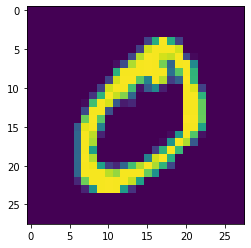

In [13]:
plt.imshow(data['x_train'][0][:,:])